<div style="text-align: right"><sub>This notebook is distributed under the <a href="https://creativecommons.org/licenses/by-sa/4.0/" target="_blank">Attribution-ShareAlike 4.0 International (CC BY-SA 4.0) license</a>.</sub></div>
<h1>Hands on Machine Learning  <span style="font-size:12px;"><i>by <a href="https://webgrec.ub.edu/webpages/000004/cat/dmaluenda.ub.edu.html" target="_blank">David Maluenda</a></i></span></h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a href="https://atenea.upc.edu/course/view.php?id=85709" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/upc_logo_49px.png" width="130"/>
    </a>
  </td>
  <td>
  </td>
  <td>   <!-- gColab -->
    <a href="https://colab.research.google.com/github/dmaluenda/hands_on_machine_learning/blob/master/03_CNN_Autoencoder.ipynb" target="_blank">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/colab_logo_32px.png" />
      Run in Google Colab
    </a>
  </td>
  <td>   <!-- github -->
    <a href="https://github.com/dmaluenda/hands_on_machine_learning/blob/master/03_CNN_Autoencoder.ipynb" target="_blank">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/github_logo_32px.png" />
      View source on GitHub
    </a>
  </td>
  <td>   <!-- download -->
    <a href="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/03_CNN_Autoencoder.ipynb"  target="_blank"
          download="03_CNN_Autoencoder">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/download_logo_32px.png" />
      Download notebook
      </a>
  </td>
</table>

# $\text{III}$. Convolutional Neural Networks and Autoencoders (using Keras)

Hands on "Machine Learning on Classical and Quantum data" course of
[Master in Photonics - PHOTONICS BCN](https://photonics.masters.upc.edu/en/general-information)
[[UPC](https://photonics.masters.upc.edu/en) +
[UB](https://www.ub.edu/web/ub/en/estudis/oferta_formativa/master_universitari/fitxa/P/M0D0H/index.html?) +
[UAB](https://www.uab.cat/en/uab-official-masters-degrees-study-guides/) +
[ICFO](https://www.icfo.eu/lang/studies/master-studies)].

Tutorial 3

This notebook shows how to:
- implement a neural network using the Tensorflow/Keras module
- recognize/classify images with dense nets (supervised learning)
- recognize/classify images with convolutional nets (supervised learning)
- implement image denoising using pseudo-autoencoders (almost unsupervised learning)
- dimension reduction with autoencoders
- quick review of: U-net, GAN, cGAN and VAE (unsupervised learning)
- understand train, validation and test datasets
- implement callbacks, like an automatic early stopper

**References**:

[1] [Machine Learning for Physicists](https://machine-learning-for-physicists.org/) by Florian Marquardt.<br>
[2] [Keras](https://keras.io/getting_started/): a deep learning API written in Python.<br>
[3] [Tensorflow](https://www.tensorflow.org/api_docs/python/tf): an open source machine learning platform.<br>
[4] [Using neural nets to recognize handwritten digits](http://neuralnetworksanddeeplearning.com/chap1.html).<br>
[5] [pix2pix](https://www.tensorflow.org/tutorials/generative/pix2pix): Image-to-image translation with a conditional GAN.<br>
[6] Dimension reduction in [Towards data science](https://ekamperi.github.io/machine%20learning/2021/01/21/encoder-decoder-model.html) <br>
[7] VAE example on [Towards data science](https://towardsdatascience.com/variational-autoencoders-as-generative-models-with-keras-e0c79415a7eb).<br>
[8] https://github.com/kartikgill/Autoencoders.<br>
[9] https://github.com/dhanushkamath/VariationalAutoencoder. <br>


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#0.-Imports:-Basics-and-tensorflow" data-toc-modified-id="0.-Imports:-Basics-and-tensorflow-0">0. Imports: Basics and tensorflow</a></span></li><li><span><a href="#1.-Import-data" data-toc-modified-id="1.-Import-data-1">1. Import data</a></span><ul class="toc-item"><li><span><a href="#1.1-Labels-preprocessing-(One-hot-encoding-for-classification)" data-toc-modified-id="1.1-Labels-preprocessing-(One-hot-encoding-for-classification)-1.1">1.1 Labels preprocessing (One hot encoding for classification)</a></span></li></ul></li><li><span><a href="#2.-Introduction-to-Tensorflow-and-Keras:-Image-recognition-with-a-fully-connected-neural-network" data-toc-modified-id="2.-Introduction-to-Tensorflow-and-Keras:-Image-recognition-with-a-fully-connected-neural-network-2">2. Introduction to Tensorflow and Keras: Image recognition with a fully connected neural network</a></span><ul class="toc-item"><li><span><a href="#2.1-Image-preprocessing-(flatten-images-for-dense-networks)" data-toc-modified-id="2.1-Image-preprocessing-(flatten-images-for-dense-networks)-2.1">2.1 Image preprocessing (flatten images for dense networks)</a></span></li><li><span><a href="#2.2-Network-definition-using-tensorflow/keras" data-toc-modified-id="2.2-Network-definition-using-tensorflow/keras-2.2">2.2 Network definition using tensorflow/keras</a></span></li><li><span><a href="#2.3-One-epoch-training-with-single-steps" data-toc-modified-id="2.3-One-epoch-training-with-single-steps-2.3">2.3 One epoch training with single steps</a></span></li><li><span><a href="#2.4-Train-for-several-epochs" data-toc-modified-id="2.4-Train-for-several-epochs-2.4">2.4 Train for several epochs</a></span></li></ul></li><li><span><a href="#3.-Image-recognition-with-a-CNN" data-toc-modified-id="3.-Image-recognition-with-a-CNN-3">3. Image recognition with a CNN</a></span></li><li><span><a href="#4.-Image-Denoiser-(pseudo-unsupervised-learning)" data-toc-modified-id="4.-Image-Denoiser-(pseudo-unsupervised-learning)-4">4. Image Denoiser (pseudo-unsupervised learning)</a></span></li><li><span><a href="#5.-Autoencoder-for-dimension-reduction-(unsupervised-training)" data-toc-modified-id="5.-Autoencoder-for-dimension-reduction-(unsupervised-training)-5">5. Autoencoder for dimension reduction (unsupervised training)</a></span></li><li><span><a href="#6.-[Just-read]-Autoencoders-for-random-face-generator" data-toc-modified-id="6.-[Just-read]-Autoencoders-for-random-face-generator-6">6. [Just read] Autoencoders for random face generator</a></span></li></ul></div>

## 0. Imports: Basics and tensorflow

The module tensorflow have to be installed.

If a 'typeDict' error is triggered, install numpy==1.21

`!pip install numpy==1.21`  # it should not be needed. Use it if "'numpy' has no attribute 'typeDict'" error

`!pip install -U tensorflow`

In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist  # dataset of handwritten numbers

import numpy as np

import matplotlib.pyplot as plt  # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300  # highres display

# for updating display 
# (very simple animation)
from IPython.display import clear_output
from time import time, sleep

## 1. Import data

In this tutorial we will use the MNIST dataset. It is a dataset with many images depicting handwritten numbers and their corresponding numeric value.

We will do three exercises with this dataset:

1. detect the handwritten numbers (classification)
1. denoise images (pseudo-autoencoder)
1. dimensional reduction (autoencoder)

One key point on using data for training neural networks is to have three independent subsets.

 - Training dataset: It is used for training. The biggest subset, typically around 70%.
 - Validation dataset: It is used to monitor the training, but not used for backpropagation. Typically around 15%.
 - Test dataset: It is used only after the training in order to check the performance of the neural network. Typically around 15%.
 
The function below returns a whole dataset of 70k handwritten numbers and their corresponding number. It is split in this three independent sub-datasets with 50k for training, 10k for validation, and 10k for test.

In [2]:
"""
mnist_loader
~~~~~~~~~~~~

taken from Nielsen's online book:
http://neuralnetworksanddeeplearning.com/chap1.html


A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

def load_data():
    """ Return three datasets (train/val/test), each one being a tuple of
         - numpy array of setSize x 28 x 28 x 1: Set of images
         - numpy array of setSize x 1: Set of ground truth values
        setSize is 50000 for the train set and 10000 for the val and test sets.
    """
    
    # get raw data: a tuple of two entries (train/test) each one 
    #  being also a tuple of two entries, one for a set of 28x28 images
    #  and the other being a set of their corresponding integers
    (train_val_X, train_val_y), (test_X, test_y) = mnist.load_data()

    # to convert values from 0 to 255 into range 0. to 1.
    train_val_X = train_val_X.astype('float32') / 255.
    test_X = test_X.astype('float32') / 255.
    
    # Conv2D need 3D images (row, columns, chanels), so adding the chanel dimension
    train_val_X = np.reshape(train_val_X, (len(train_val_X), 28, 28, 1)) 
    test_X = np.reshape(test_X, (len(test_X), 28, 28, 1))
    
    train_X = train_val_X[:-10000]
    val_X = train_val_X[-10000:]

    train_y = train_val_y[:-10000]
    val_y = train_val_y[-10000:]
    
    return (train_X, train_y), (val_X, val_y), (test_X, test_y)

(train_x, train_y), (val_x, val_y), (test_x, test_y) = load_data()

Run the cell below to check a handwritten number. run it several times to see check different samples.

train_x: (50000, 28, 28, 1)
train_y: (50000,)
val_x: (10000, 28, 28, 1)
val_y: (10000,)
test_x: (10000, 28, 28, 1)
test_y: (10000,)


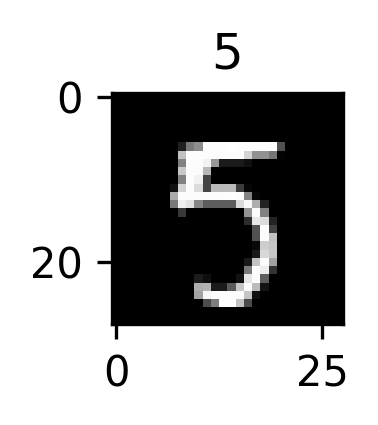

In [5]:
print("train_x:", train_x.shape)
print("train_y:", train_y.shape)

print("val_x:", val_x.shape)
print("val_y:", val_y.shape)

print("test_x:", test_x.shape)
print("test_y:", test_y.shape)

idx = np.random.randint(0,50000)
plt.figure(figsize=(1,1))
plt.imshow(train_x[idx,:,:], cmap='gray')
plt.title(train_y[idx]);

### 1.1 Labels preprocessing (One hot encoding for classification)

The best strategy for categorical classification (classify inputs into categories) is to have one dedicated output neuron for each possible category. In this way, the assigned category for a given input will correspond to the most activated (hottest) output neuron. This is called one hot encoding.

Check [this](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) for more information on one hot encoding.

Therefore, the first step is to prepare the dataset in this way.

The MNIST dataset contains pairs of $x$ images and $y$ labels. The labels are integers corresponding to the truly handwritten value. Then, take the three imported raw datasets and create $y$ vectorized labels as _one hot encoding_, so they should be vectors of 10 components where all them are zero, except for the corresponding true handwritten number.

For example, a $3$ should be `[0 0 0 1 0 0 0 0 0 0 0]` and a $7\rightarrow$ `[0 0 0 0 0 0 0 1 0 0]` and so on.

In [6]:
def one_hot_enc(ds):
    ds_size = ds.shape[0]
    enc = np.zeros((ds_size, 10))
    for idx, label in enumerate(ds):
        enc[idx, label] = 1
        
    return enc

train_y_vec = one_hot_enc(train_y)
val_y_vec = one_hot_enc(val_y)
test_y_vec = one_hot_enc(test_y)

## 2. Introduction to Tensorflow and Keras: Image recognition with a fully connected neural network

Let's start with a fully connected network (also known as dense networks or perceptron).
They are not convolutional networks, but let's start with the simplest case, just to introduce tensorflow and keras.

### 2.1 Image preprocessing (flatten images for dense networks)

The input of fully connected neural networks (dense networks) are several neurons, corresponding to a vector (1D). However, we have images as input data (2D). So, we have to flatten that images. So, take the images from the three raw datasets and flatten them.

In [36]:
def flatten(ds):
    ds_size = ds.shape[0]
    print((ds.size/ds_size))
    flat = np.zeros((ds_size, 28*28))
    for idx in range(ds_size):
        img = ds[idx]
        flat[idx, :] = img.flatten()
        
    return flat

train_x_flat = flatten(train_y)
val_x_flat = flatten(val_y)
test_x_flat = flatten(test_y)

1.0
1.0
1.0


Create a function to show a handwritten number where the title contains the one hot encoding vector. Take the flatten image and reshape it to check all works well.

### 2.2 Network definition using tensorflow/keras

Let's define a dense network with one hidden layer containing about 30 neurons.

Check [`tensorflow.keras.Sequencial`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) class and its methods, e.g. [`add()`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#add) to create a neural network model.

Check also [`tensorflow.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) to add fully connected layers.

For categorical classification, the output layer should deal with a [softmax activation function](https://gombru.github.io/2018/05/23/cross_entropy_loss/). The hidden layer can be done with any other activation function (relu, sigmoid, etc) try different activation function for the hidden layer and check its behavior.

In [49]:
dense1 = tf.keras.Sequential()
dense1.add(tf.keras.layers.Input((28*28)))
dense1.add(tf.keras.layers.Dense(30, activation='relu'))
dense1.add(tf.keras.layers.Dense(10, activation='softmax'))

Check the method [`compile()`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile) to configure the model for training.

This means to assign a loss function, an optimizer, and some metrics.

 - The loss function is to compute the backpropagation. For the one hot encoding classification, the most sensitive loss function is the categorical cross entropy.
 - The most used optimizer is the Adam, an adaptive learning rate based on the momentum statistics. Check [`tensorflow.keras.optimizers.adam`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
 - The metrics are also evaluated over the training and the validation datasets during the training and they are stored in the history to show the progress of the training, just for monitor the training progress. It is an very optional argument.

In [53]:
dense1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Use the `summary()` method of your sequential network to check the created model.

In [54]:
dense1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                23550     
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
Total params: 23860 (93.20 KB)
Trainable params: 23860 (93.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 2.3 One epoch training with single steps

Train one epoch (the whole training dataset) on batches of 100 items by using the [`train_on_batch()`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#train_on_batch) method of your model.

Remember that one epoch is considered when the whole training dataset is used, whereas one step is one backpropagation made over one batch of data.
So, `steps * batchsize = training_dataset_size`.

The `train_on_batch()` returns the cost of that certain training step. Store all that costs over all the iterations and plot them at the end.

Let's check the network performance by doing some predictions on the test dataset and comparing them to the ground truth.

You can use the method [`predict_on_batch()`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#predict_on_batch) to check the behavior of the training after one epoch on the test dataset. 

Remember that the output is _one hot encoded_, so the predicted vector is a set of probabilities. The predicted value is the maximum one.

Then compare the predicted handwritten value with the ground truth and compute the accuracy as the number of good predictions over the total.

Show some wrong predicted images and print the probabilities obtained.

### 2.4 Train for several epochs

To refine the training, it can be done several epochs, let's say 30. Check the [`fit()`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit) method, where you can set the batchsize and the number of epochs to train. Also, check the `validation_data` argument to be able to provide the validation dataset. This method, returns a history. Store that history to check it after training.

Also, measure the elapsed time in order to compare it with the convolutional network.

In [66]:
history = dense1.fit(train_x_flat, train_y_vec, validation_data=(val_x_flat, val_y_vec), epochs=20, initial_epoch=10) 

Epoch 11/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3227 - accuracy: 0.9446 - val_loss: 0.3626 - val_accuracy: 0.8991
Epoch 12/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2970 - accuracy: 0.9496 - val_loss: 0.2752 - val_accuracy: 1.0000
Epoch 13/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2643 - accuracy: 0.9649 - val_loss: 0.3454 - val_accuracy: 0.8030
Epoch 14/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2505 - accuracy: 0.9595 - val_loss: 0.2442 - val_accuracy: 1.0000
Epoch 15/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2311 - accuracy: 0.9632 - val_loss: 0.1965 - val_accuracy: 1.0000
Epoch 16/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2130 - accuracy: 0.9637 - val_loss: 0.2846 - val_accuracy: 0.7901
Epoch 17/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1980 - accuracy: 0.9692 - val_loss: 0.1718 - val_ac

Check every printed line. What are the _xxxx/xxxx_ numbers in front of the progress bar? See how `loss` and `val_loss` progress over the epochs.

Which type of variable this history is? Check also `history.history`.

`history.history` contains the losses and the metrics, for both the training and the validation datasets. Plot that curves.

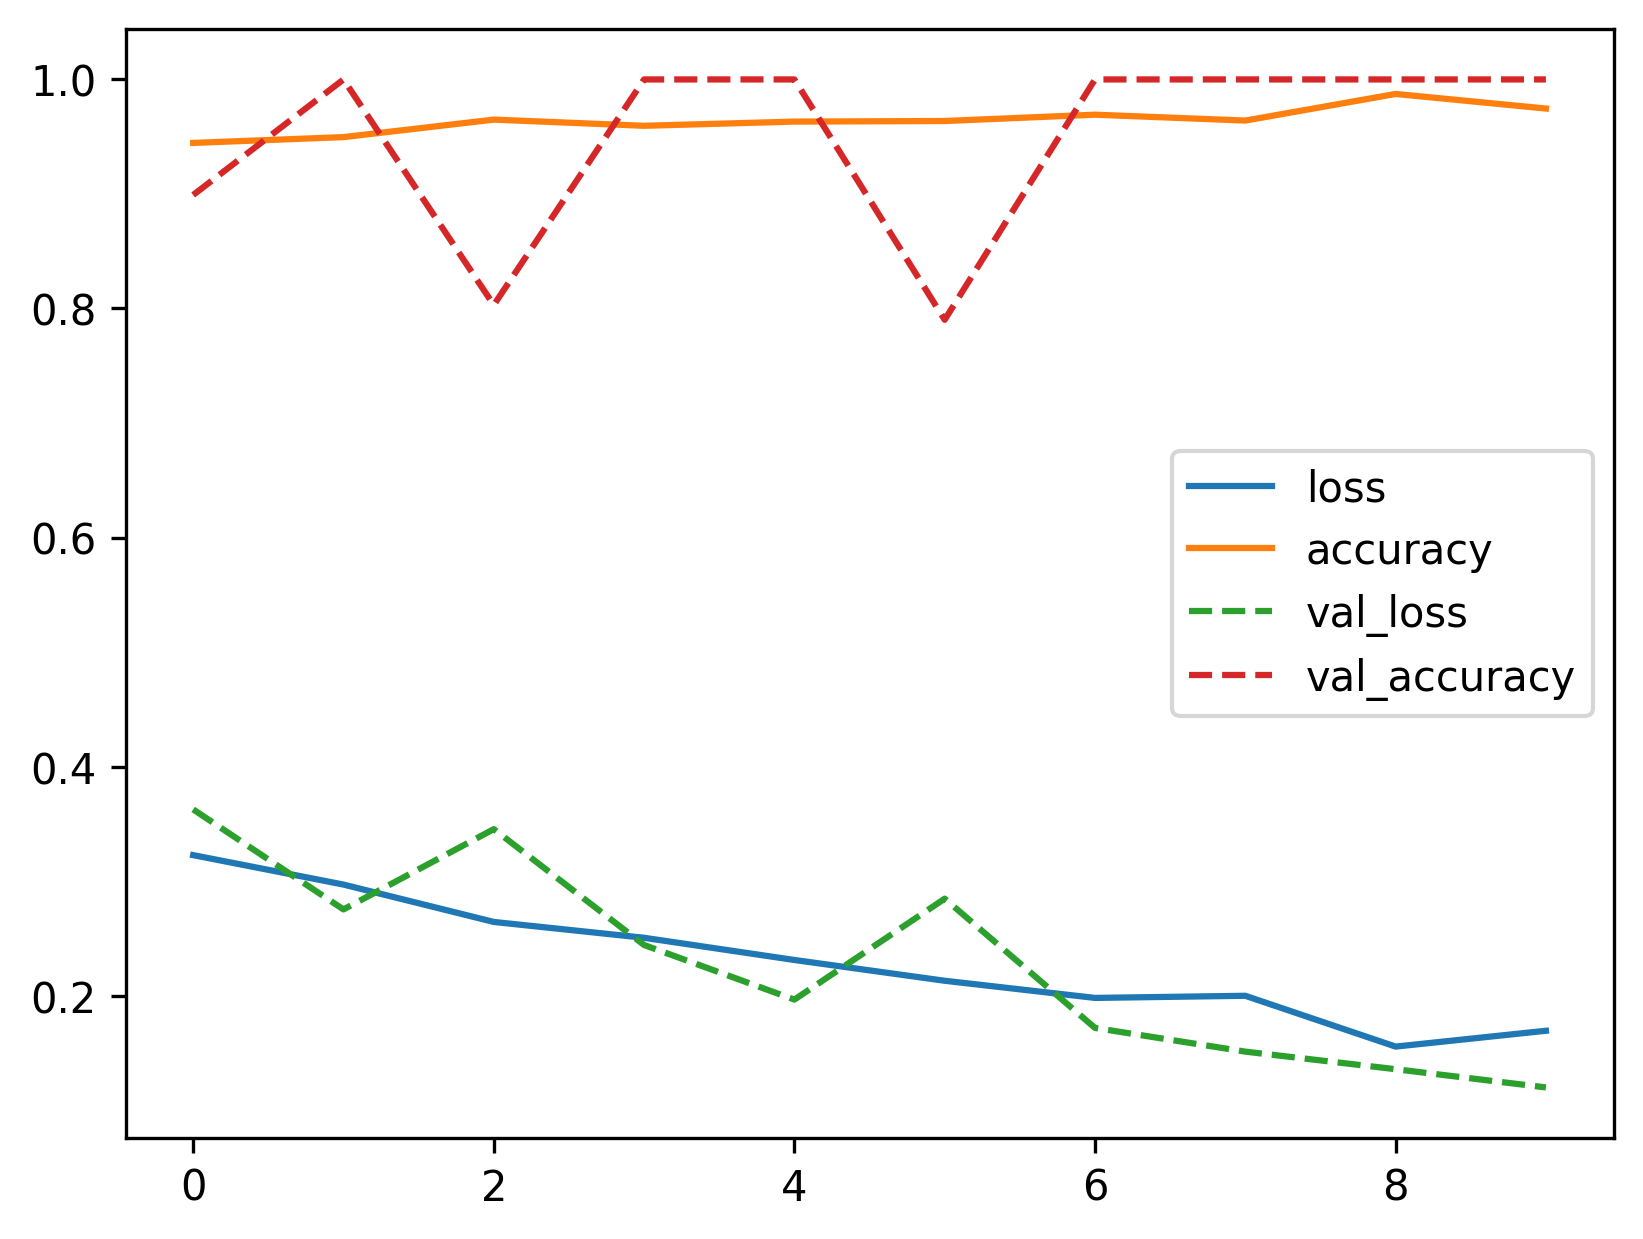

In [70]:
for name, values in history.history.items():

    plt.plot(values, '--' if name.startswith('val_') else '-', label=name)
    
plt.legend()

What happen if validation loss/accuracy is saturated while the training loss/accuracy is getting better? Is that situation good?

Check again the accuracy of the model over the test dataset. Has it increase after training with more epochs? and training it with more and more epochs?

## 3. Image recognition with a CNN

Let's do the same with a Convolutional Neural Network. Just to recall what they are:

![https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg](https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg)
![https://docs.ecognition.com/Resources/Images/ECogUsr/UG_CNN_scheme.png](https://docs.ecognition.com/Resources/Images/ECogUsr/UG_CNN_scheme.png)

Define a convolutional neural network of three bottle necks (cnn2d+maxPooling). Use again a `Sequential()` model and use `tf.keras.layers.Conv2D` and `tf.keras.layers.MaxPooling2D` layers.

Convolutional layers deals with 2D data. However, we want a 1D output of 10 neurons (one hot encoding vector). So use the `tf.keras.layers.Flatten` layer and add a final `Dense` layer. Remember, this last layer should have the softmax activation function, while the convolutional could be (relu, sigmoid...).

Plot the summary of the model. Check how many *trainable parameters* it have and compare it with the fully connected network done before.

Use the `fit` method to train the model with 10 epochs. Check the elapsed time and compare it with the fully connected. Also store the history and plot the progress.

Check the accuracy of predictions over the test dataset and compare it with the dense model.

## 4. Image Denoiser (pseudo-unsupervised learning)

Let's try to remove noise from noisy images.

An autoencoder is a model made of two parts: encoder + decoder, having a bottle neck in the middle (a flatten vector typically called code or embedding).

Usually, autoencoders are fed with the same image $x$ in both, the input and the output. However, we can slightly modify this by setting a $x$ noisy image in the input and a $x'$ clean image in the output. Then, the model should learn to remove noise of noisy images.

![https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/Autoencoder_structure.png/350px-Autoencoder_structure.png](https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/Autoencoder_structure.png/350px-Autoencoder_structure.png)

First of all, we need to add noise to the images. Then we can use that as input, while the original will be the clean output.

In [3]:
tr_ae, vl_ae, te_ae = load_data()

train_clean = tr_ae[0]
val_clean = vl_ae[0]
test_clean = te_ae[0]

noise_factor = 0.5
# random values as noise source
train_noisy = train_clean + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_clean.shape)  
val_noisy = val_clean + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=val_clean.shape) 
test_noisy = test_clean + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_clean.shape) 

# to make values in the range of 0 to 1: values<0 -> 0 while values>1 -> 1.
train_noisy = np.clip(train_noisy, 0., 1.)   
val_noisy = np.clip(val_noisy, 0., 1.)
test_noisy = np.clip(test_noisy, 0., 1.)

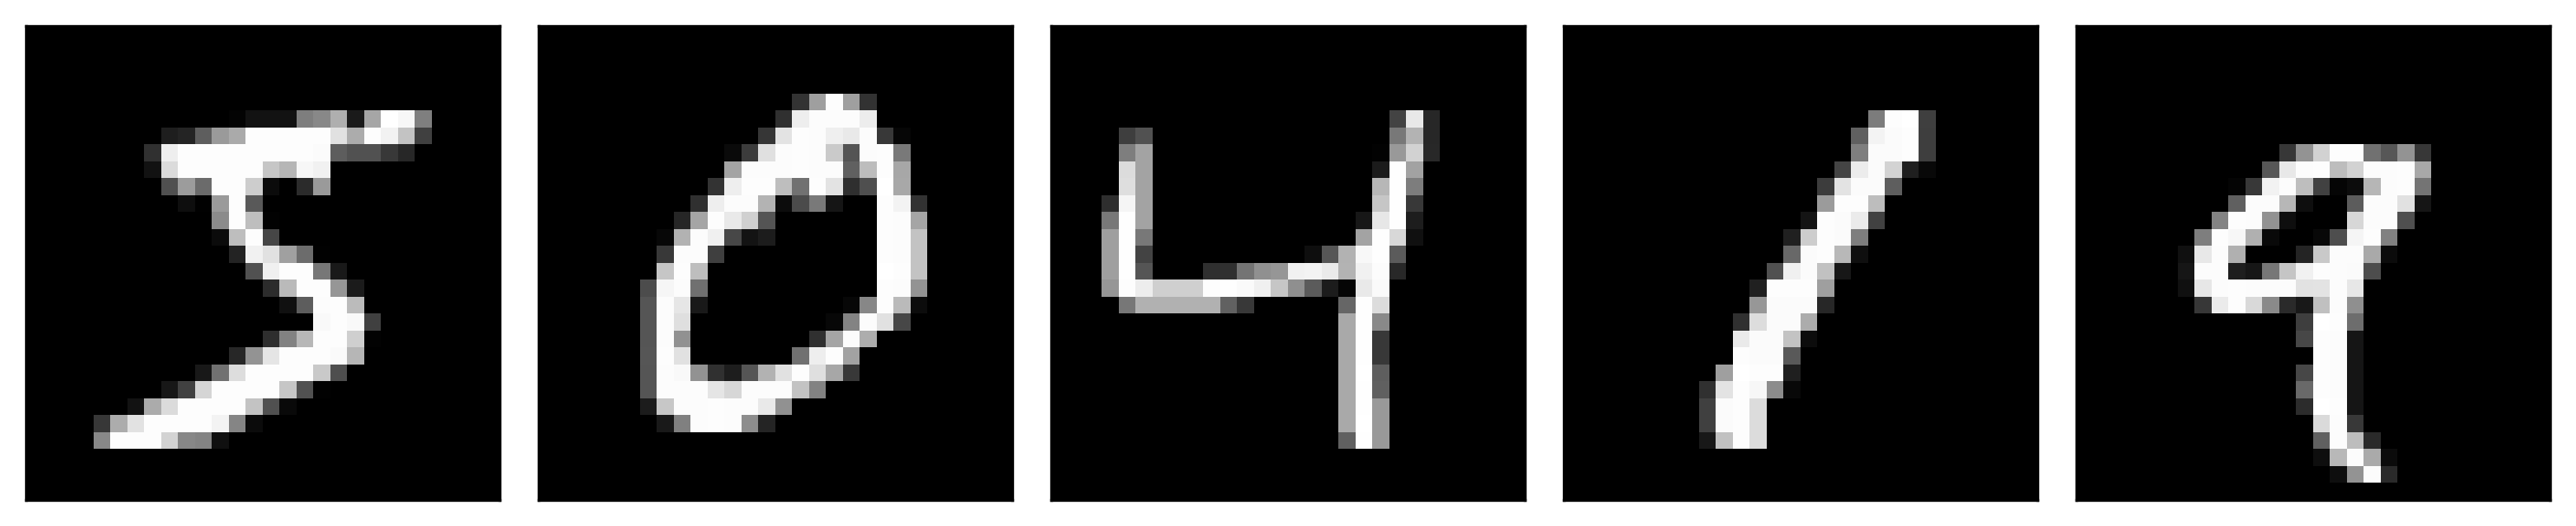

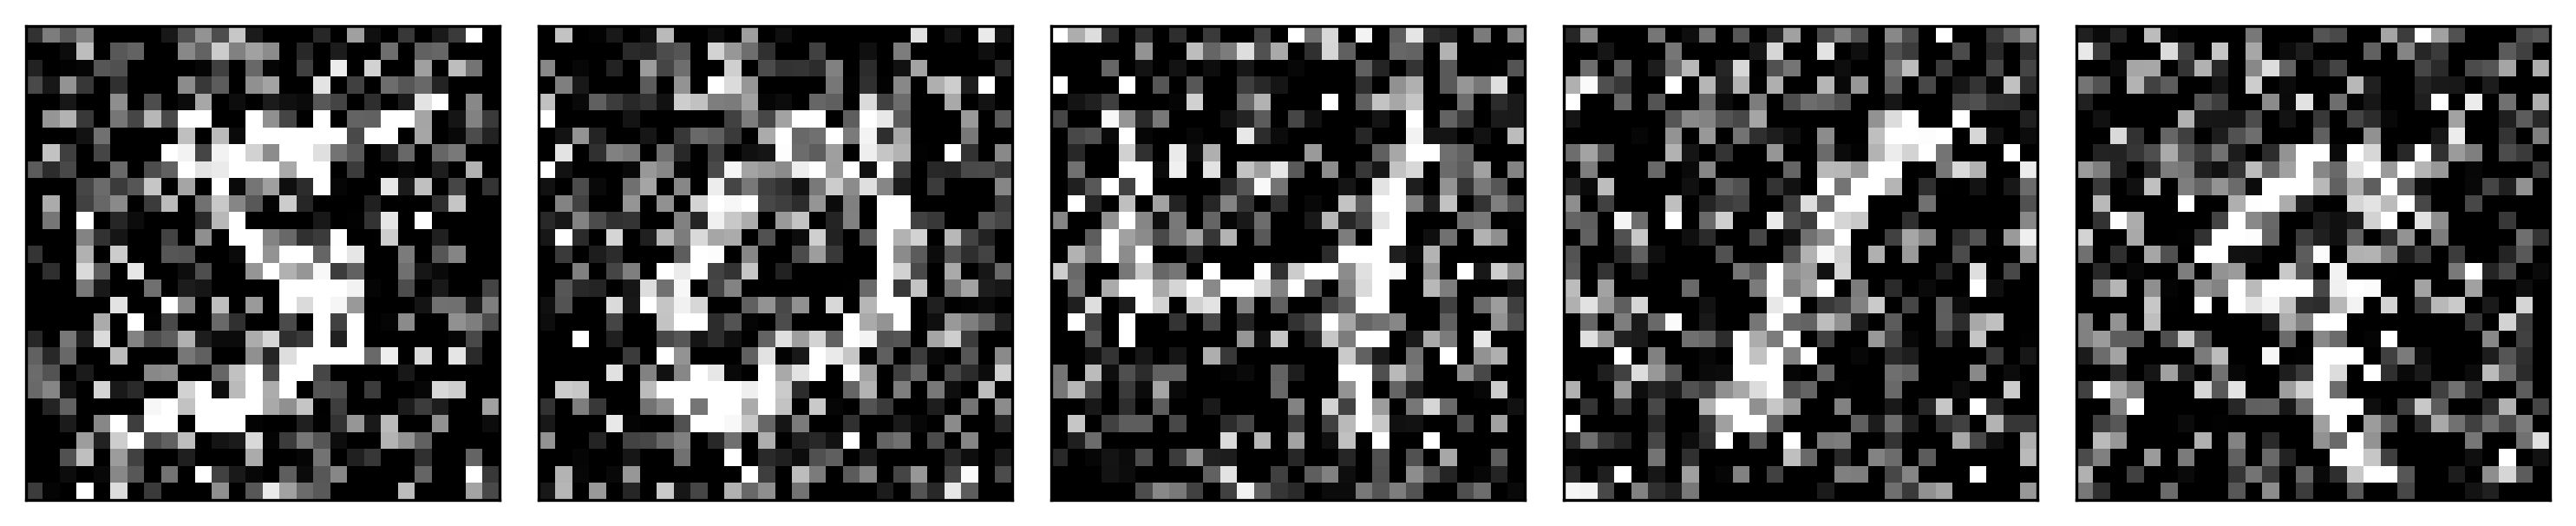

In [4]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_clean[i,:,:], cmap='gray')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_noisy[i,:,:], cmap='gray')
plt.tight_layout()
plt.show()

Create the autoencoder having three downsampling steps in the encoder and three upsamplig steps in the decoder.

In this case, try to do it in the _functional_ approach, instead of adding layers with the `add()` method. It is the same, but sometimes it is more convenient.

Check https://www.tensorflow.org/guide/keras/functional_api#introduction

Train the model some epochs using the `fit()` method. In this case, let's learn some features provided by tensorflow.

Check the `shuffle` input parameter of the `fit` function and activate it. What it does? Why can be useful?

Another possibility is to add callbacks on the `fit` method. The callbacks are functions or classes that are call after every training step. In this case, try to add an [`EarlyStopping()`](https://keras.io/api/callbacks/early_stopping/) callback to finish the training when the loss is saturated for **three epochs** on the **validation dataset** with a **minimum threshold of $0.005$**, set also the `verbose=1` to monitor it behavior. To be sure that the early stopper is triggered, set a huge number of epochs.

Plot the progress via the history.

Remove the noise on the test dataset using the `predict()` method.

Make a subplot having three rows and 5 columns to show 5 different images. Show in the first row the clean image, the noisy in the second and, finally, the noise-removed image by the model in the third.

If the result is not quite satisfactory, try to train again the model or to modify the parameters on the conv2D layers.

*Check better results on [the original page](https://keras.io/examples/vision/autoencoder/)*.

## 5. Autoencoder for dimension reduction (unsupervised training)

Let's do a truly autoencoder where the input and the output is forced to be the same. It can seem stupid, but we will force to pass through a bottle neck, the embedding. Then, the model will learn to condensate all the information on a image to a few of numbers.

Let's set an embedding of just two neurons.

So, make an autoencoder, made of two separated parts, the encoder and the decoder. So, this is two separated `Sequential` models and then, merged by something like `tf.keras.Model(inputs=encoder.input, outputs=decoder(encoder.output))`.

Fit it with the images for 10 epochs and plot the progress.

Generate fake digits by setting random numbers in the embedding vector, and run (predict) the decoder model with that random numbers. What you see? It is a number?

Make a grid of $9\times9$ subplots showing the fake digit generated by increasing/decreasing the value of one or the other component of the embedding.

## 6. [Just read] Autoencoders for random face generator

Check the [`random_face_generator.ipynb` notebook](https://github.com/dhanushkamath/VariationalAutoencoder/blob/master/Variational_Autoencoder.ipynb), it is based on the same principle.